In [1]:
# Building the models to predict the heart disease based on the dataset.

In [219]:
# Importing the CSV file
import pandas as pd

df = pd.read_csv('heart.csv')

In [220]:
# Viewing the data df
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


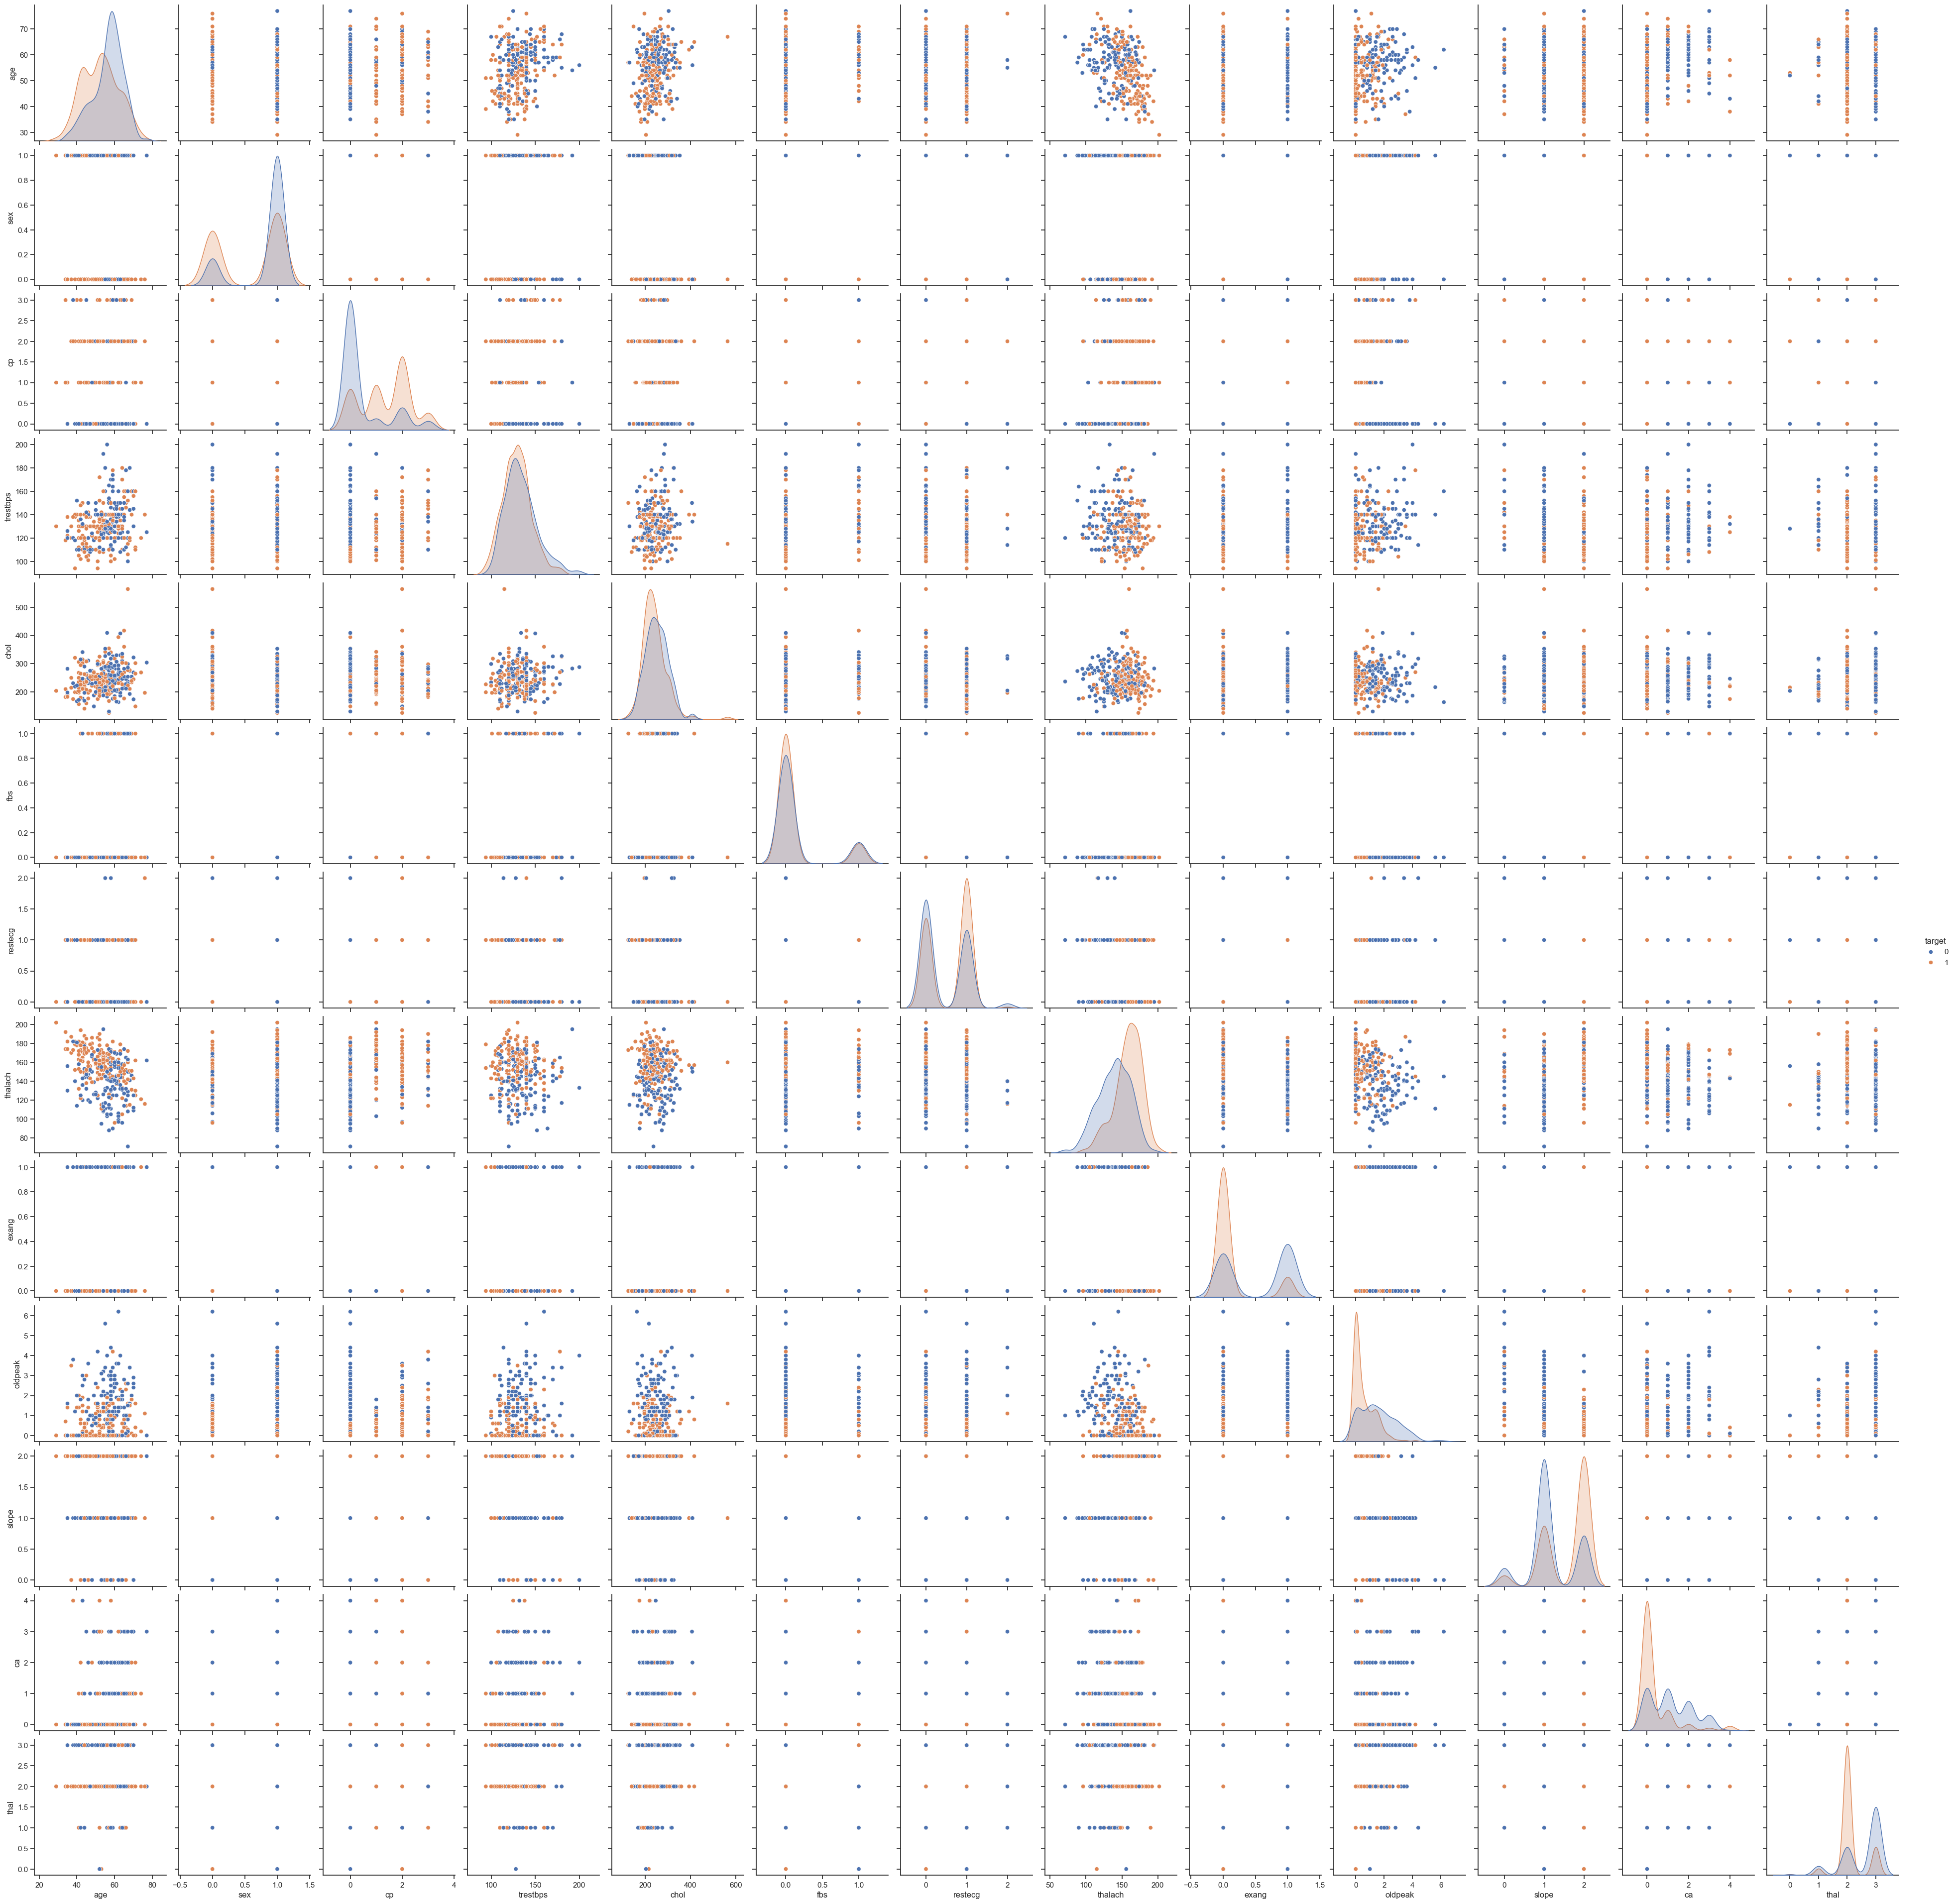

In [221]:
# Creating Graphs to visualize the data using seaborn library
import seaborn as sns

sns.pairplot(df, hue='target', palette='deep', height=3)

In [222]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [223]:
# Correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [224]:
# Dividing the data into independent and dependent variables
X = df.drop('target', axis=1)
Y = df['target']

In [226]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [225]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [227]:
# Feature Scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaled = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(scaled, columns = X.columns)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667


In [228]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667


In [229]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [230]:
# Using Various ML models to predict the heart disease
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [231]:
# Creating the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [232]:
# Storing the results with classification report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    # Accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    report = classification_report(Y_test, Y_pred, output_dict=True)
    # Storing the results
    results[name] = {
        'Model': model,
        'Accuracy': accuracy,
        'Report': report
    }

In [233]:
# Viewing the results in format
model_names = []
accuracy = []
report = []

for model_name, results in results.items():
    model_names.append(model_name)
    accuracy.append(results['Accuracy'])
    report.append(results['Report'])

    print(f"Model: {model_name}")
    print(f"  Accuracy: {results['Accuracy']}")
    print(f"  Classification Report:\n", results['Report'])
    print()

Model: Logistic Regression
  Accuracy: 0.8146341463414634
  Classification Report:
 {'0': {'precision': 0.8809523809523809, 'recall': 0.7254901960784313, 'f1-score': 0.7956989247311828, 'support': 102.0}, '1': {'precision': 0.768595041322314, 'recall': 0.9029126213592233, 'f1-score': 0.8303571428571429, 'support': 103.0}, 'accuracy': 0.8146341463414634, 'macro avg': {'precision': 0.8247737111373474, 'recall': 0.8142014087188274, 'f1-score': 0.8130280337941629, 'support': 205.0}, 'weighted avg': {'precision': 0.8244996688455669, 'recall': 0.8146341463414634, 'f1-score': 0.8131125660334945, 'support': 205.0}}

Model: Random Forest
  Accuracy: 0.9853658536585366
  Classification Report:
 {'0': {'precision': 0.9714285714285714, 'recall': 1.0, 'f1-score': 0.9855072463768116, 'support': 102.0}, '1': {'precision': 1.0, 'recall': 0.970873786407767, 'f1-score': 0.9852216748768473, 'support': 103.0}, 'accuracy': 0.9853658536585366, 'macro avg': {'precision': 0.9857142857142858, 'recall': 0.98543

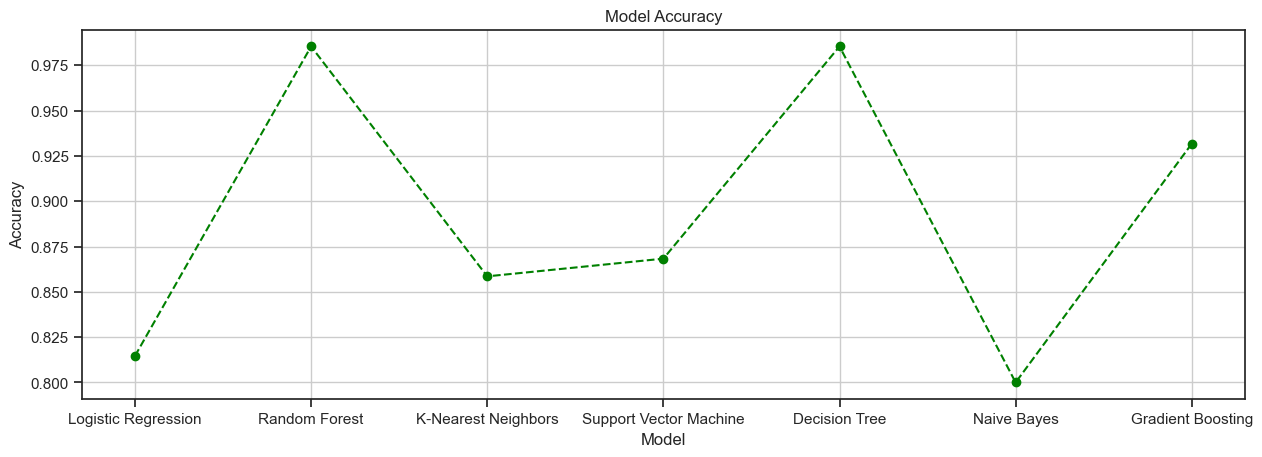

In [234]:
# Plotting the results
import matplotlib.pyplot as plt

plt.figure().set_figwidth(15)
plt.plot(model_names, accuracy, marker='o', linestyle='--', color='green')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.grid()
plt.show()

In [235]:
# Using Tensorflow
import tensorflow as tf

print(tf.__version__)

2.15.0


In [236]:
# Importing the Tensorflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [267]:
# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [268]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [269]:
# Early Stopping od the model
early_stop = EarlyStopping(monitor="val_loss",
                           min_delta=0,
                           patience=10,
                           verbose=0,
                           mode="auto",
                           baseline=None,
                           restore_best_weights=False,
                           start_from_epoch=0)

In [270]:
# Training the model
history = model.fit(X_train, Y_train, epochs=500, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/500
26/26 [==============================] - 1s 6ms/step - loss: 0.6013 - accuracy: 0.7512 - val_loss: 0.5004 - val_accuracy: 0.7902
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 0.4330 - accuracy: 0.8073 - val_loss: 0.3993 - val_accuracy: 0.8293
Epoch 3/500
26/26 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8232 - val_loss: 0.4091 - val_accuracy: 0.8000
Epoch 4/500
26/26 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8390 - val_loss: 0.3833 - val_accuracy: 0.8488
Epoch 5/500
26/26 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8805 - val_loss: 0.3741 - val_accuracy: 0.8390
Epoch 6/500
26/26 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8915 - val_loss: 0.3651 - val_accuracy: 0.8585
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.2946 - accuracy: 0.8902 - val_loss: 0.3836 - val_accuracy: 0.8146
Epoch 8/500
2

In [271]:
# Evaluation of the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

7/7 [==============================] - 0s 1ms/step - loss: 0.3023 - accuracy: 0.9854
Loss: 0.3023090064525604, Accuracy: 0.9853658676147461


In [272]:
# Converting to DataFrame
df_history = pd.DataFrame(history.history)
df_history

,loss,accuracy,val_loss,val_accuracy
0,6.012815e-01,0.751220,0.500359,0.790244
1,4.329885e-01,0.807317,0.399273,0.829268
2,3.865002e-01,0.823171,0.409064,0.800000
3,3.616261e-01,0.839024,0.383310,0.848781
4,3.261768e-01,0.880488,0.374110,0.839024
...,...,...,...,...
495,7.724825e-07,1.000000,0.300055,0.985366
496,7.659248e-07,1.000000,0.300033,0.985366
497,7.514013e-07,1.000000,0.300837,0.985366
498,7.417628e-07,1.000000,0.301213,0.985366


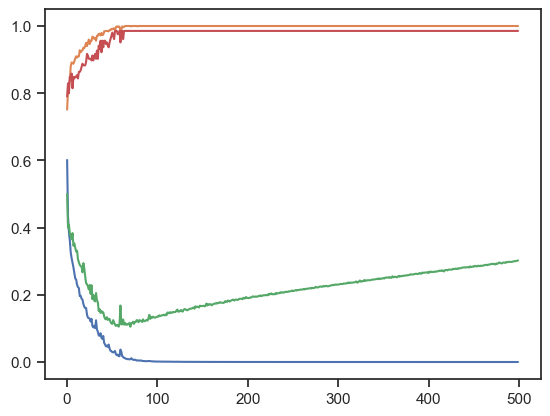

In [273]:
# Plotting the results
plt.plot(df_history)

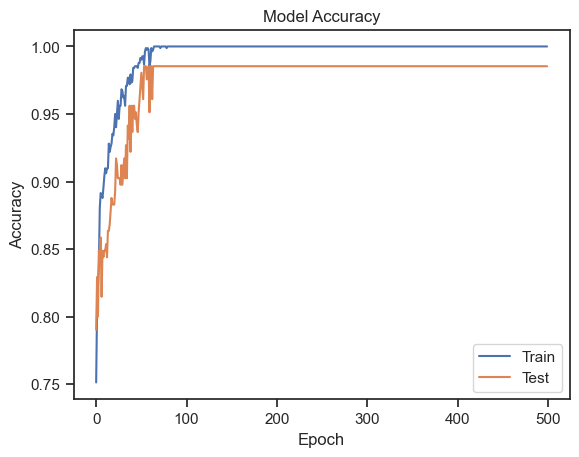

In [274]:
# Plotting Accuracy and Val_Accuracy
plt.plot(df_history['accuracy'])
plt.plot(df_history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

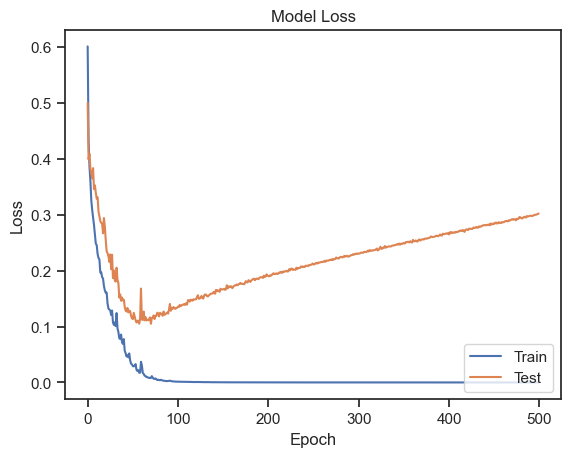

In [275]:
# Plotting Loss and Val_Loss
plt.plot(df_history['loss'])
plt.plot(df_history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()